In [1]:
#pip install plotly

In [2]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
%matplotlib inline
import warnings

# Dataset

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:
warnings.filterwarnings("ignore")

In [4]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'04-12-2020'

In [5]:
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [6]:
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [7]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [8]:
### Replace NaN values by 0
df.fillna(0, inplace=True)

In [9]:
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)

In [10]:
###Set the country name as index
df_countries.set_index('Country_Region', inplace=True)

In [11]:
### Group datas by Country
df_countries=df_countries.groupby('Country_Region').sum()

In [12]:
### Sort 15 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top 15 entries
df_countries_top15 = df_countries.head(15)
###Index columns as DataFrame series
cols = df_countries_top15.keys()
###Some Active data are missing , so let's do the maths to correst this
pd.options.mode.chained_assignment = None
df_countries_top15['Active'] = df_countries_top15['Confirmed'] - (df_countries_top15['Recovered'] + df_countries_top15 ['Deaths'])

In [13]:
df_countries_top15_grouped = df_countries_top15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_top15_grouped = df_countries_top15_grouped.reset_index()

In [14]:
### Show Countries with most Active cases
df_countries_top15_grouped_active = df_countries_top15_grouped[df_countries_top15_grouped['Active']==0]
df_countries_top15_grouped_active = df_countries_top15_grouped[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_top15_grouped_active = df_countries_top15_grouped.sort_values('Active', ascending=False)
df_countries_top15_grouped_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
13,US,555313,22020,32988,500305
7,Italy,156363,19899,34211,102253
4,France,133670,14412,27469,91789
10,Spain,166831,17209,62391,87231
14,United Kingdom,85206,10629,626,73951
5,Germany,127854,3022,60300,64532
12,Turkey,56956,1198,3446,52312
6,Iran,71686,4474,43894,23318
8,Netherlands,25746,2747,295,22704
1,Brazil,22192,1223,173,20796


In [15]:
df_countries_min15 = df_countries.tail(15)

In [16]:
df_countries_min15 = df_countries_min15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_min15 = df_countries_min15.reset_index()

In [17]:
### Show Countries with less Active cases
df_countries_min15_active = df_countries_min15[df_countries_min15['Active']==0]
df_countries_min15_active = df_countries_min15[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_min15_active = df_countries_min15.sort_values('Active', ascending=True)
df_countries_min15_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
12,Timor-Leste,2,0,1,1
14,Yemen,1,0,0,1
9,Papua New Guinea,2,0,0,2
0,Bhutan,5,0,2,3
7,Mauritania,7,1,2,4
8,Nicaragua,9,1,4,4
10,Sao Tome and Principe,4,0,0,4
11,South Sudan,4,0,0,4
1,Burundi,5,0,0,5
2,Cabo Verde,8,1,1,6


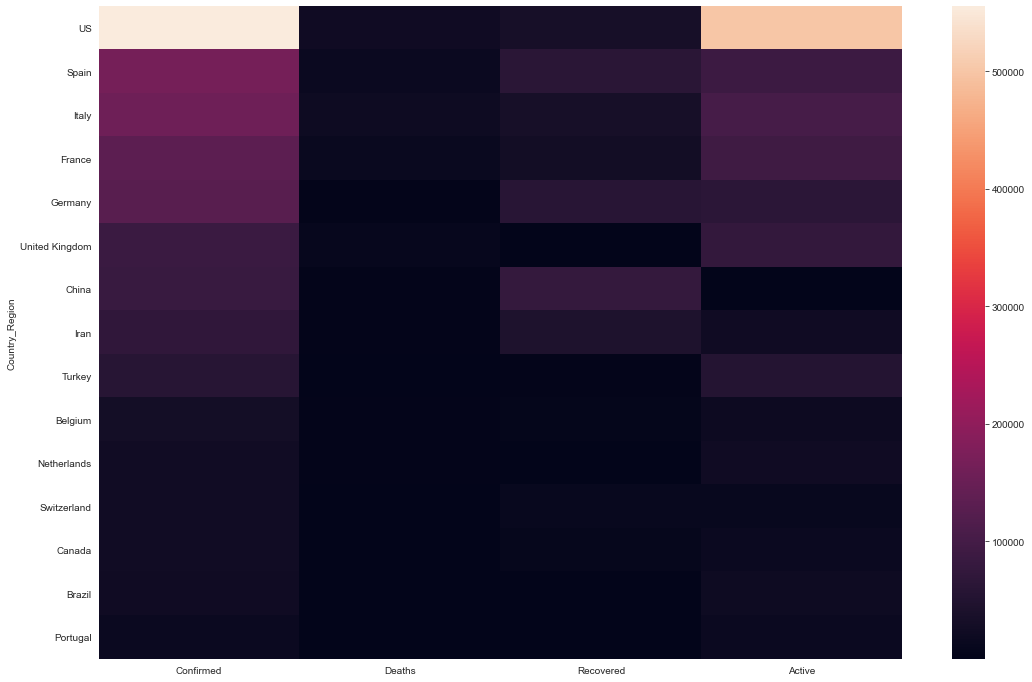

In [18]:
### Show heatmap
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top15)

In [19]:
### Show Correlation Table 
df_countries_top15.describe()

,Confirmed,Deaths,Recovered,Active
count,15.000000,15.000000,15.000000,15.000000
mean,105393.133333,7073.266667,24687.466667,73632.400000
std,134788.996205,7620.285516,26281.290868,122583.236165
min,16585.000000,504.000000,173.000000,1835.000000
25%,25580.500000,1210.500000,2036.000000,18023.500000
50%,71686.000000,3343.000000,12700.000000,23318.000000
75%,130762.000000,12520.500000,39052.500000,80591.000000
max,555313.000000,22020.000000,77956.000000,500305.000000


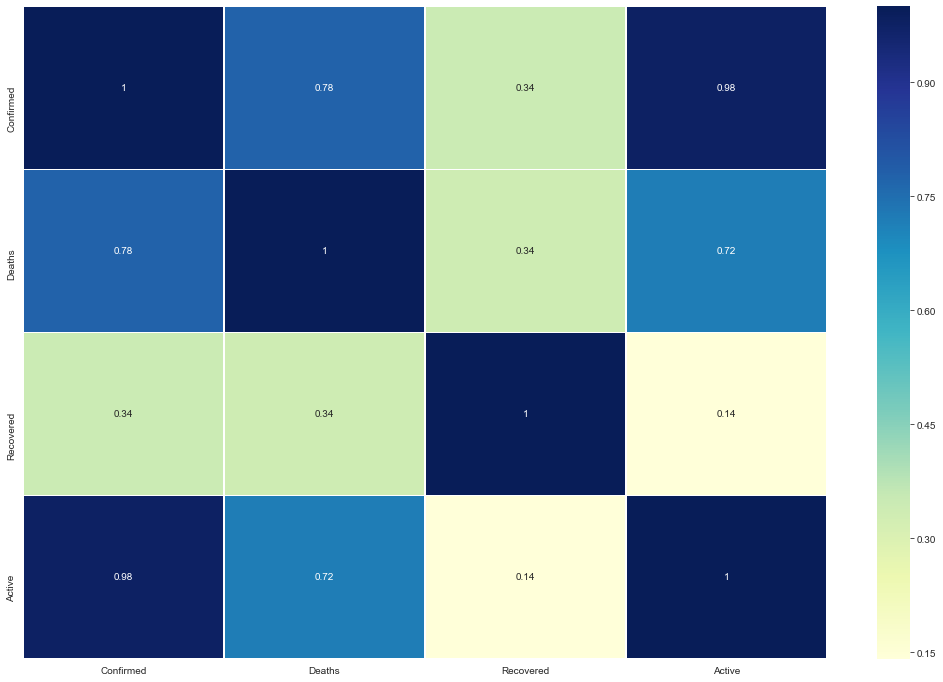

In [20]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top15.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

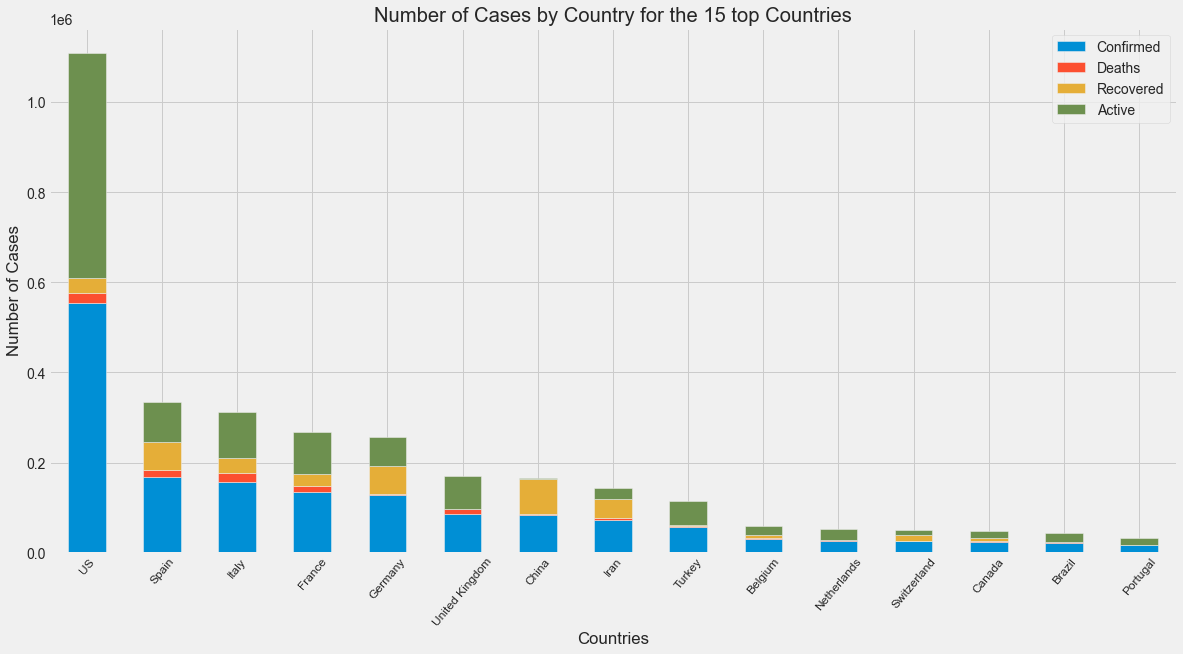

In [21]:
### Show Stacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=True)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

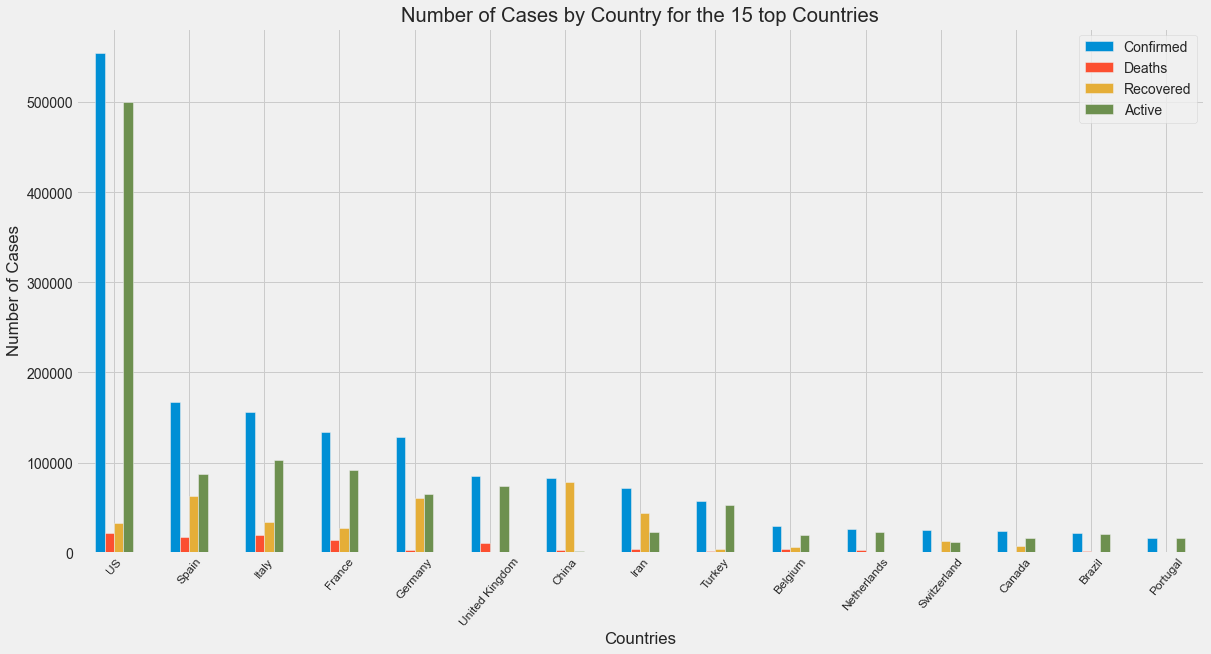

In [22]:
### Show Unstacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=False)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

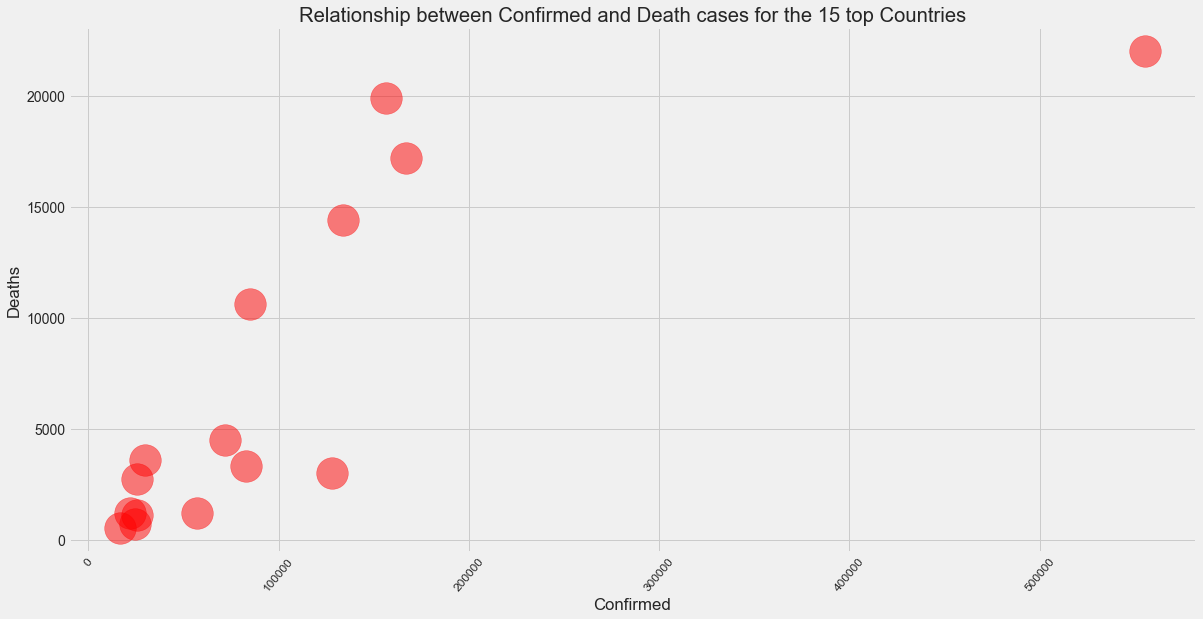

In [23]:
### Show Scatter plot
df_countries_top15.plot(kind='scatter' ,x='Confirmed',y='Deaths', alpha=0.5,color='red', figsize=(18, 9), s=1000)
plt.title('Relationship between Confirmed and Death cases for the 15 top Countries')
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.xticks(rotation=50, size=12)
plt.show()

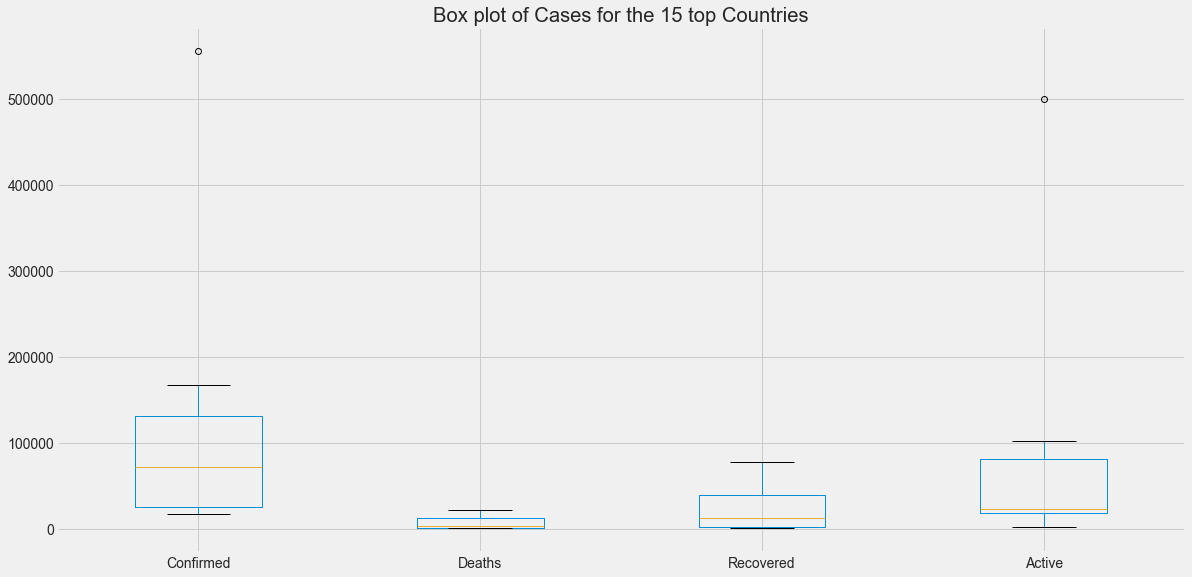

In [24]:
### Show Box plot
count = np.histogram(df_countries_top15, 15)
df_countries_top15.plot(kind ='box', 
          figsize=(18, 9))
plt.title('Box plot of Cases for the 15 top Countries')
plt.show()

In [25]:
### Sort 8 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top  entries
df_countries_top8= df_countries.head(8)
###Index columns as DataFrame series
cols = df_countries_top8.keys()
df_countries_top8.head(8)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,555313,22020,32988,500305
Spain,166831,17209,62391,87231
Italy,156363,19899,34211,102253
France,133670,14412,27469,91789
Germany,127854,3022,60300,64532
United Kingdom,85206,10629,626,73951
China,83134,3343,77956,1835
Iran,71686,4474,43894,23318


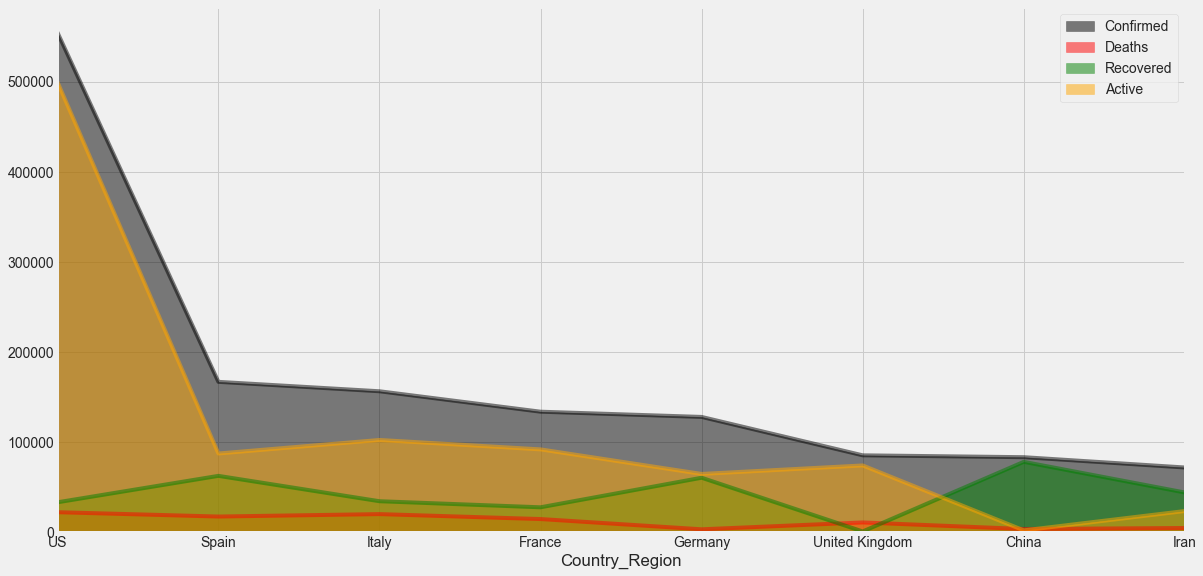

In [26]:
# Line plot top 8 countries
df_countries_top8.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['black', 'red', 'green', 'orange']) 
plt.show()

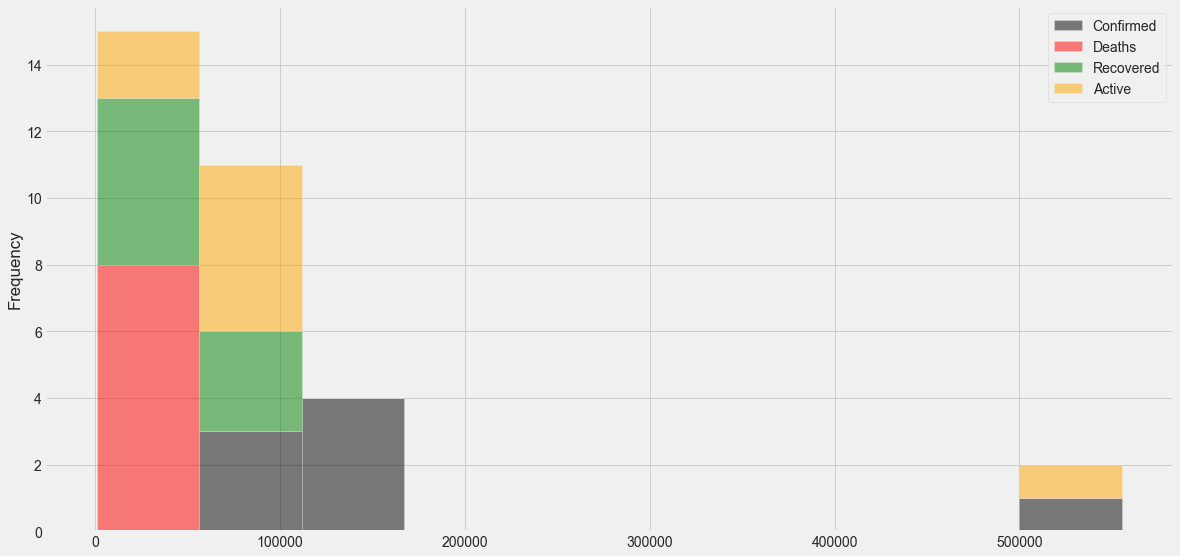

In [27]:
# Histogram plot top 8 countries
df_countries_top8.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()